# Контрольная работа №1
Работа сдается в гугл-форму, которая будет закреплена в telegram конференции группы

Работа при сдаче в гугл форму должна называться КР_Фамилия_Имя_Отчество.ipynb

Перед сдачей просьба не стирать вывод ячеек для того, чтобы преподаватель заново не запускал ваш код

Задание.

1. Загрузить набор данных, приложенный в задании.
2. Произведите обработку данных и вычисление признаков речевых сигналов (Построение мел-спектрограмм и т.д.)
3. Выполните аугментацию данных (приложите визуализации).
4. (Дополнительный бал) Обучите модель распознавания эмоционального настроения по звуку. Можно использовать как Transfer Learning, так и спроектировать собственное решение. Прогоните распознование на случайных данных из выборки (выберите методов random)

### P.S.
* 4-й пункт на дополнительные баллы, позволит перекрыть неправильные ответы в тесте.
* Прокомментируйте обработку данных и аугментацию данных

### P.S.S У вас всё получится, удачи :)

In [ ]:
# Сразу скажу, всё что здесь представленно было созданно с использованием нейросетей, сайтов, и данных с гугл диска

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/Colab_Notebooks/Crema.zip' Crema.zip
!unzip Crema.zip -d data/
!pip install torchaudio
!pip install Levenshtein

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: data/Crema/1004_IEO_NEU_XX.wav  
  inflating: data/__MACOSX/Crema/._1004_IEO_NEU_XX.wav  
  inflating: data/Crema/1011_IEO_NEU_XX.wav  
  inflating: data/__MACOSX/Crema/._1011_IEO_NEU_XX.wav  
  inflating: data/Crema/1017_ITH_SAD_XX.wav  
  inflating: data/__MACOSX/Crema/._1017_ITH_SAD_XX.wav  
  inflating: data/Crema/1002_ITH_SAD_XX.wav  
  inflating: data/__MACOSX/Crema/._1002_ITH_SAD_XX.wav  
  inflating: data/Crema/1064_TIE_ANG_XX.wav  
  inflating: data/__MACOSX/Crema/._1064_TIE_ANG_XX.wav  
  inflating: data/Crema/1071_TIE_ANG_XX.wav  
  inflating: data/__MACOSX/Crema/._1071_TIE_ANG_XX.wav  
  inflating: data/Crema/1081_DFA_SAD_XX.wav  
  inflating: data/__MACOSX/Crema/._1081_DFA_SAD_XX.wav  
  inflating: data/Crema/1026_TIE_NEU_XX.wav  
  inflating: data/__MACOSX/Crema/._1026_TIE_NEU_XX.wav  
  inflating: data/Crema/1033_TIE_NEU_XX.wav  
  inflating: data/__MACOSX/Crema/._1033_TIE_NEU_XX.wav  
  inf

In [ ]:
import os
from collections import defaultdict
from itertools import islice
from typing import Any
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torchaudio
from IPython import display
from torch import nn
from torch.utils.data import DataLoader, Dataset, Subset
from tqdm.auto import trange
import librosa
import librosa.display
import random

In [ ]:
# Код, который обрабатывает все данные и вычисляет характеристики речевых сигналов

def calculate_features(audio_file_path):

  y, sr = librosa.load(audio_file_path)

  # Рассчёт Mel-спектрограммы
  mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
  log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

  features = {
      'mel_spectrogram': log_mel_spectrogram
  }
  return features


data_dir = 'data/Crema'
for filename in os.listdir(data_dir):
  if filename.endswith('.wav'):
    audio_file_path = os.path.join(data_dir, filename)
    features = calculate_features(audio_file_path)
    break

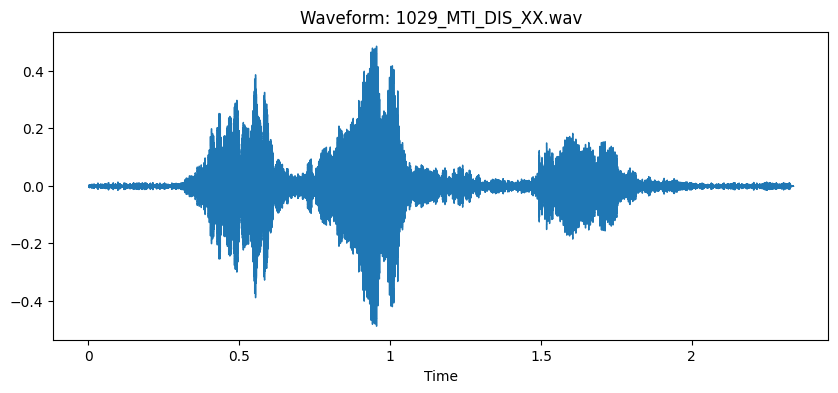

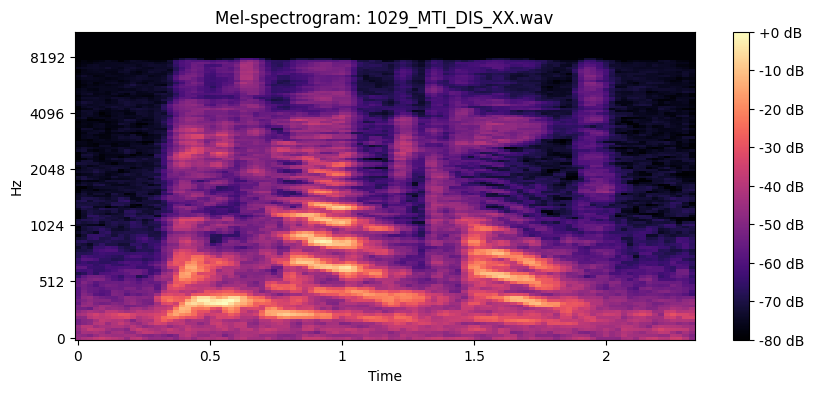

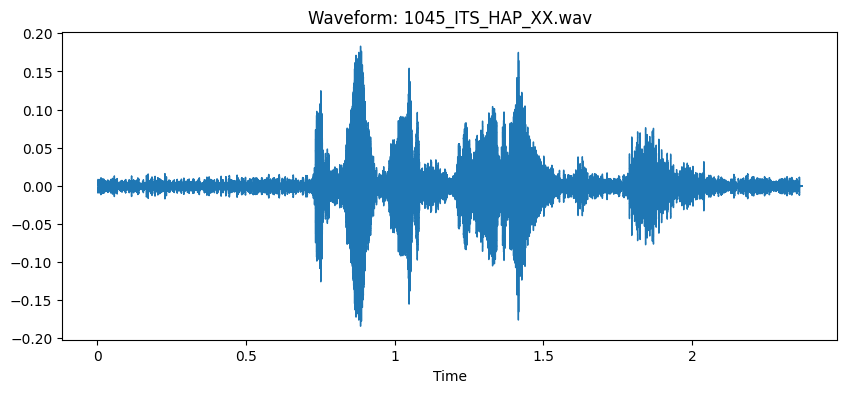

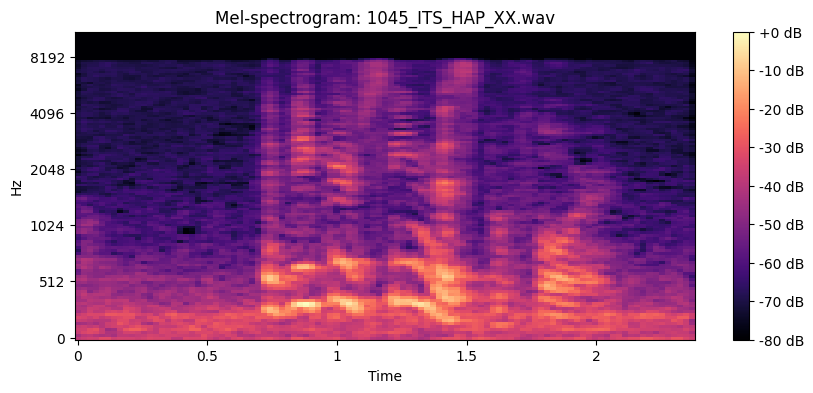

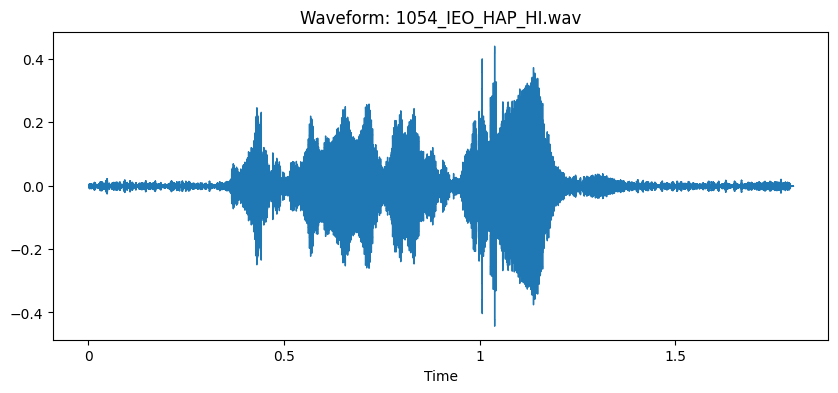

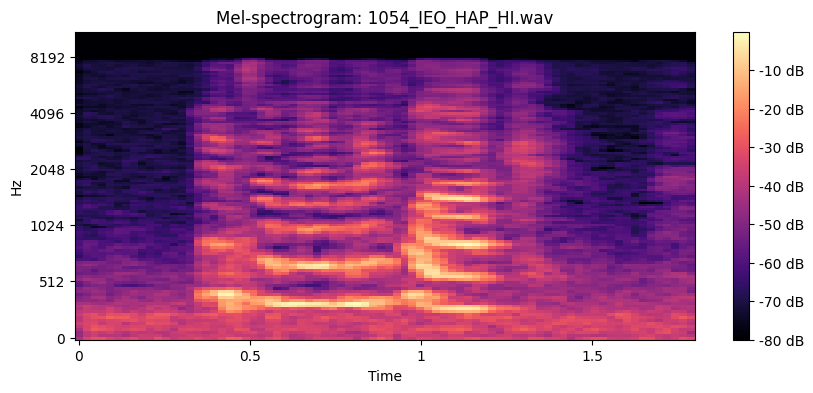

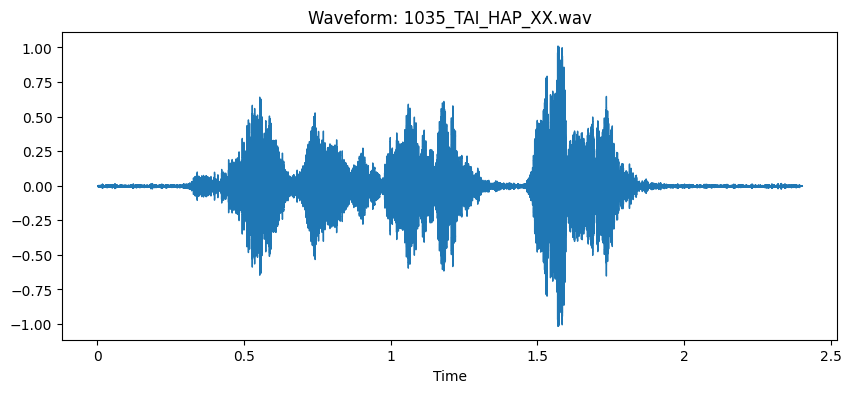

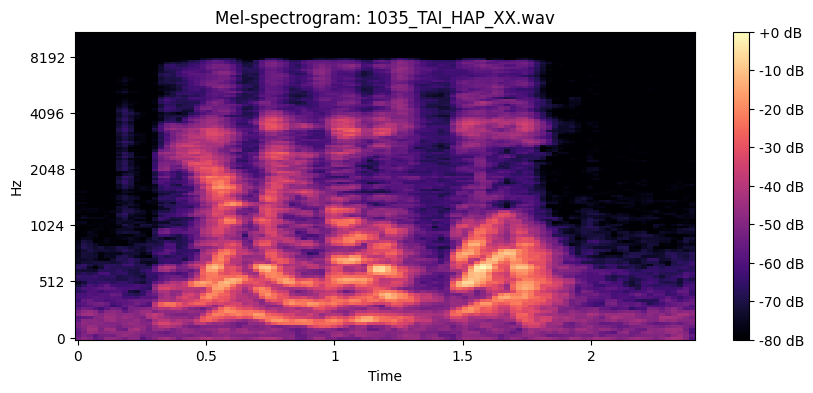

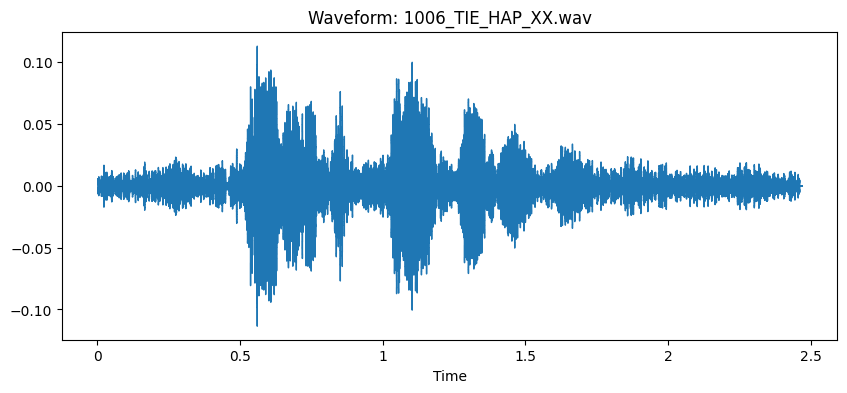

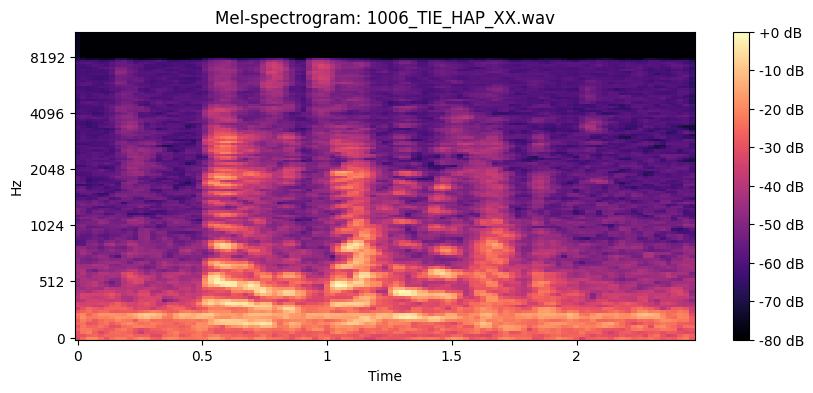

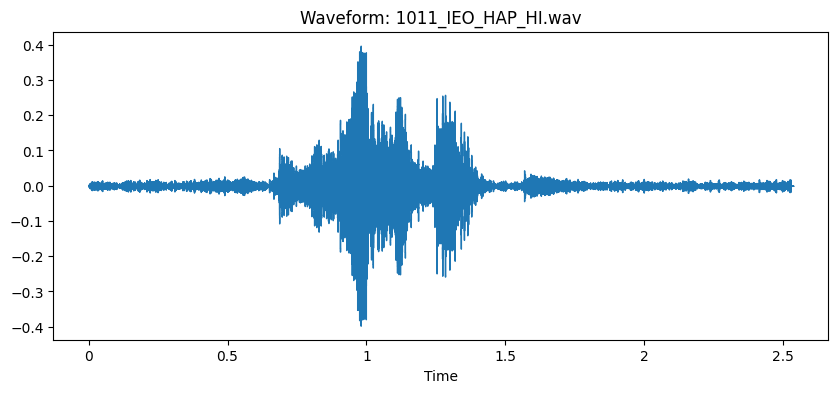

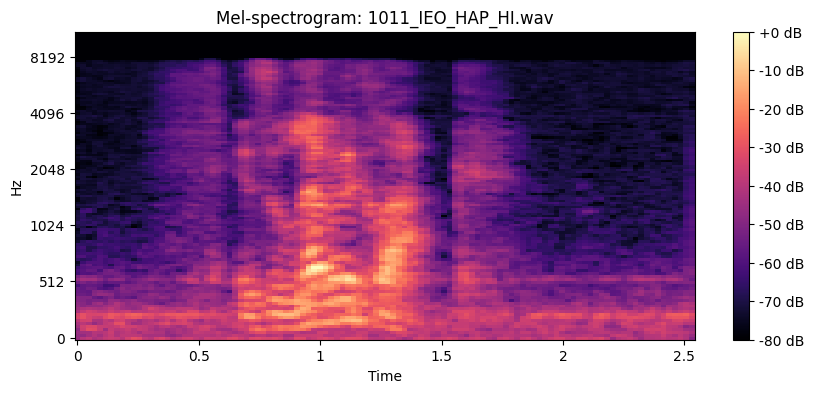

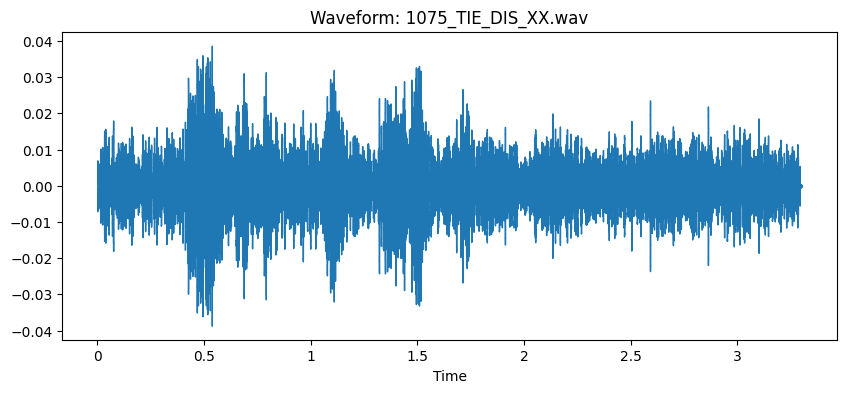

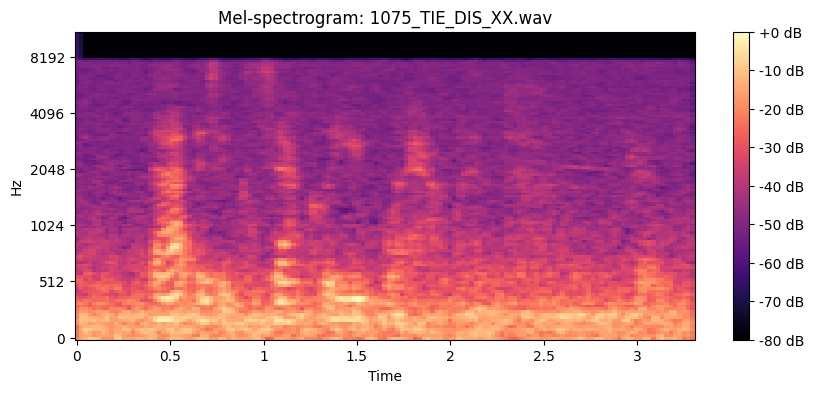

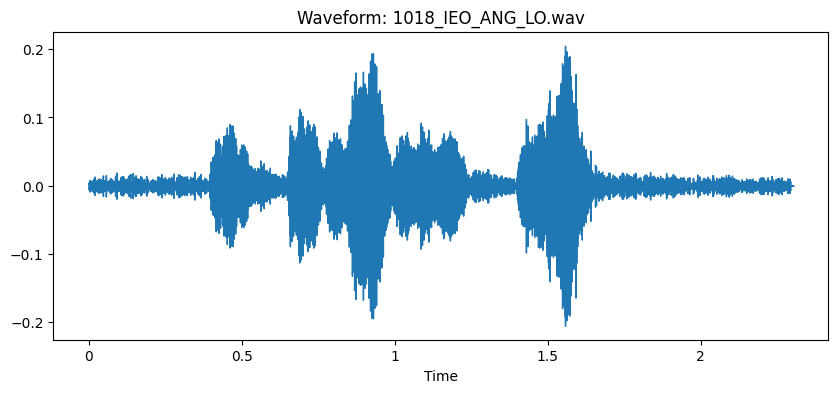

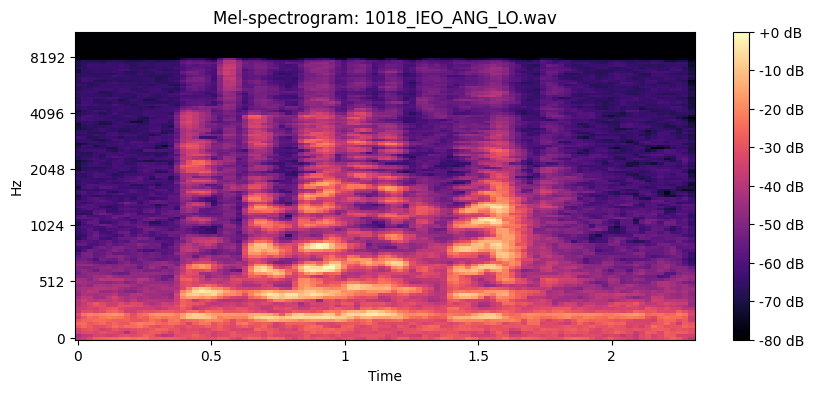

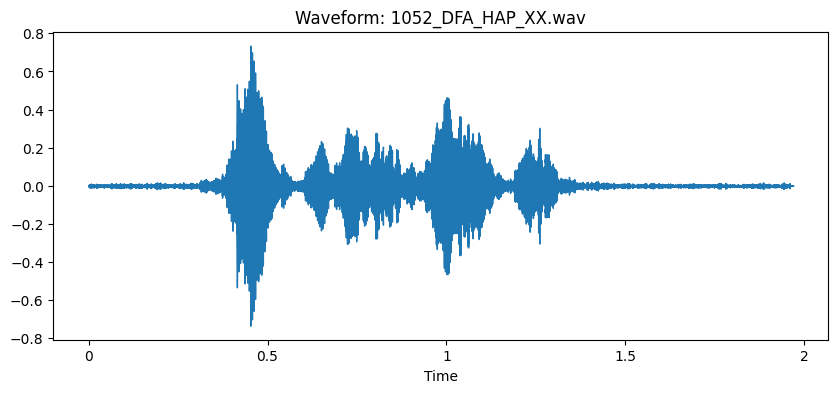

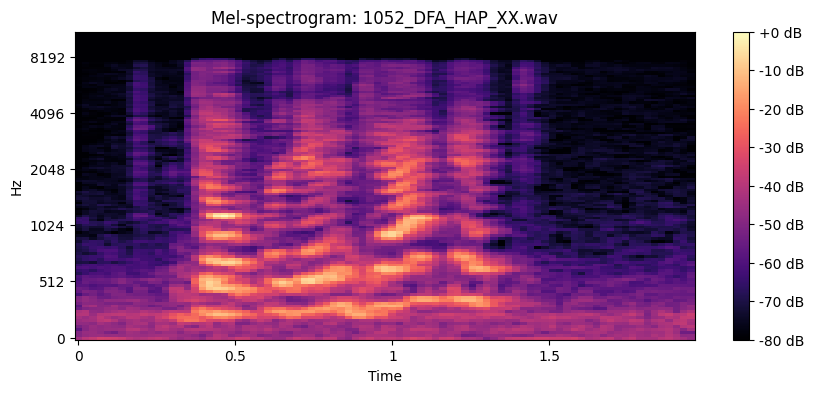

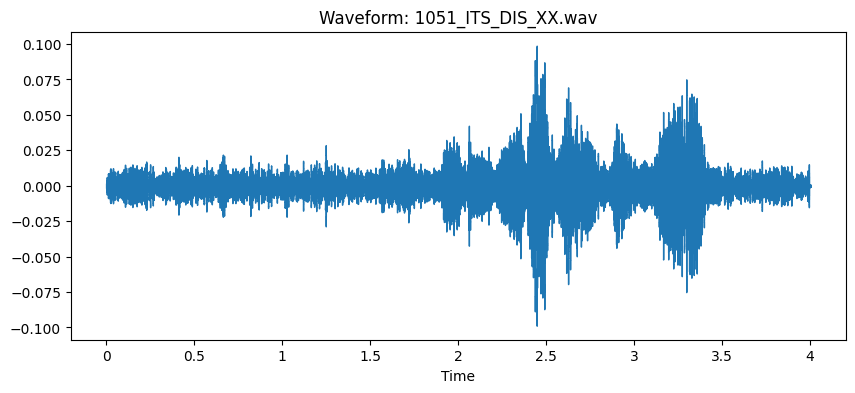

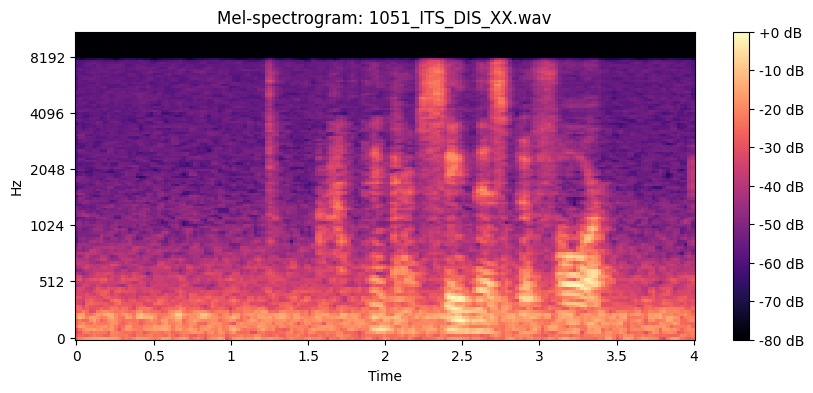

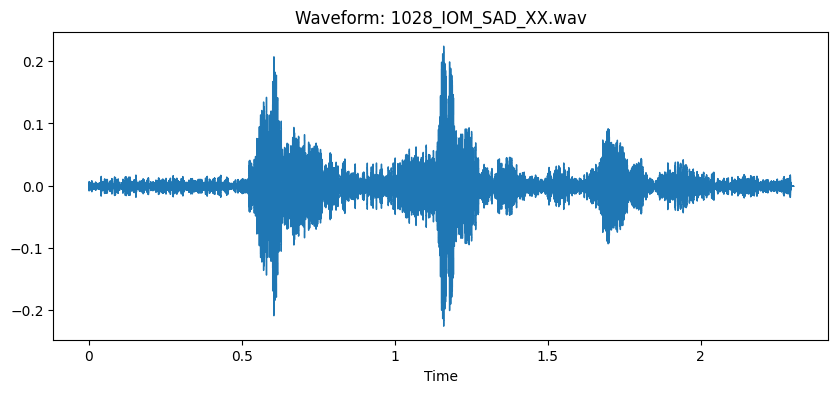

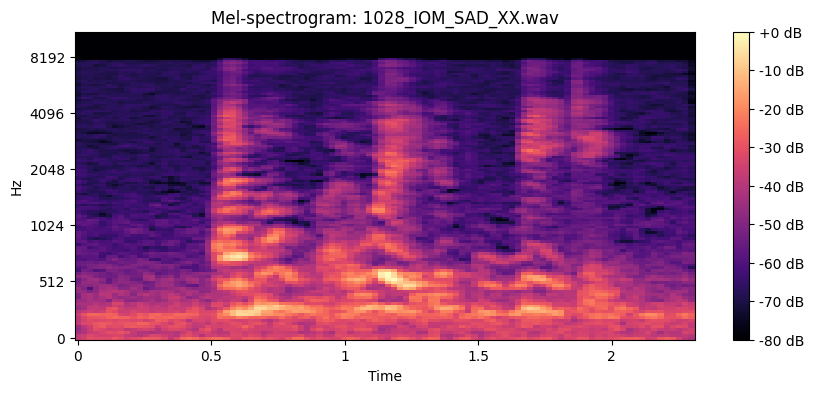

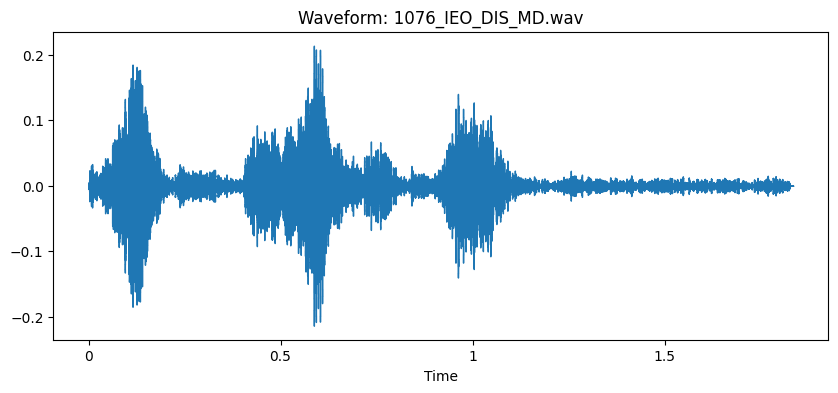

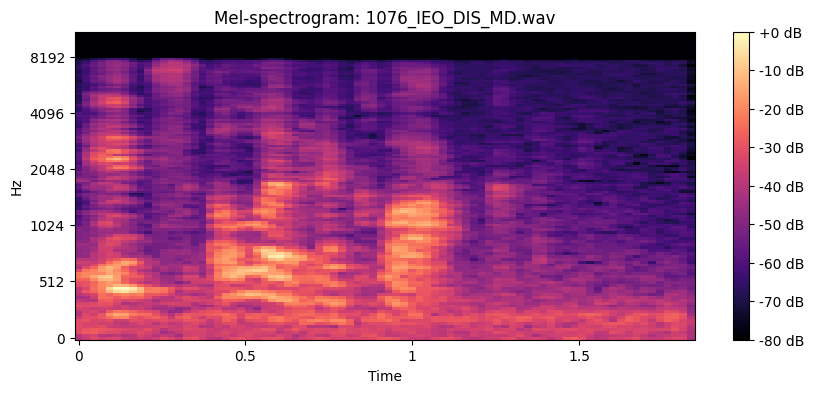

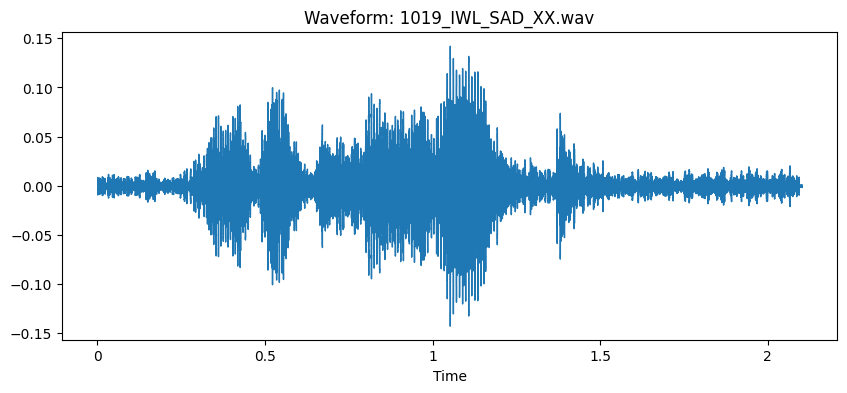

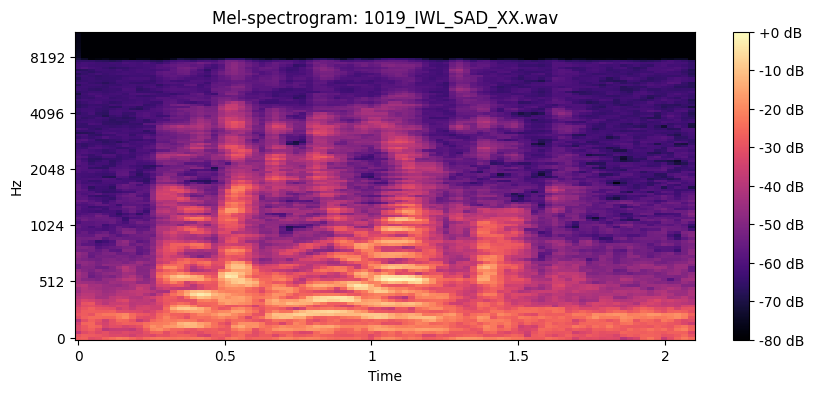

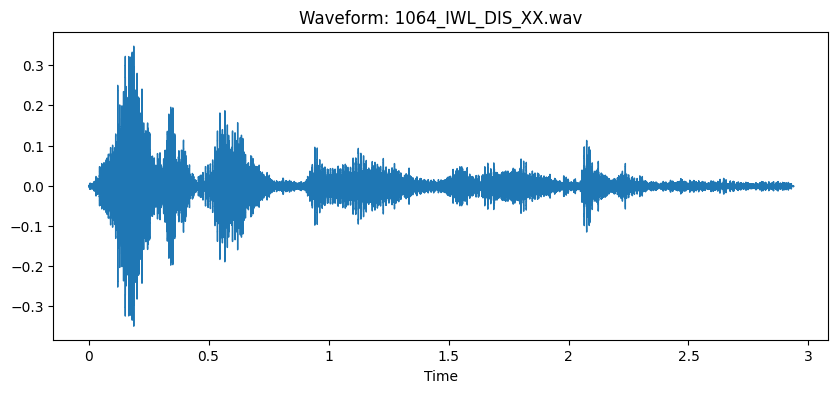

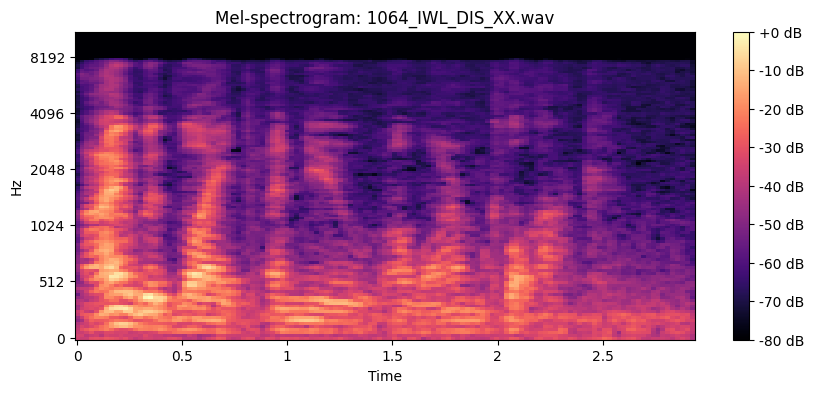

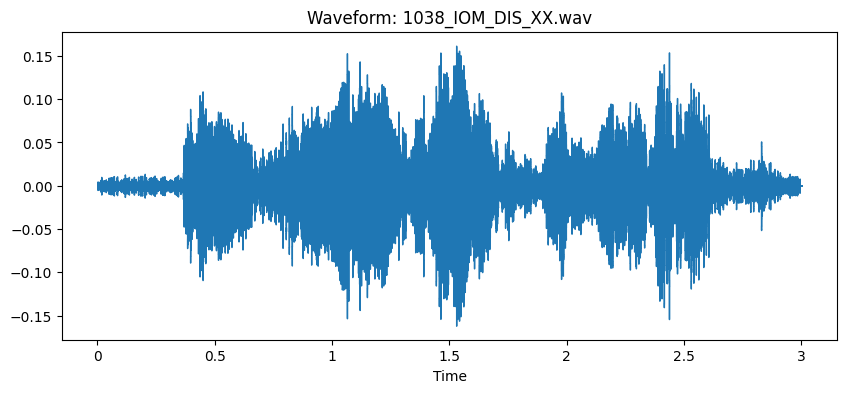

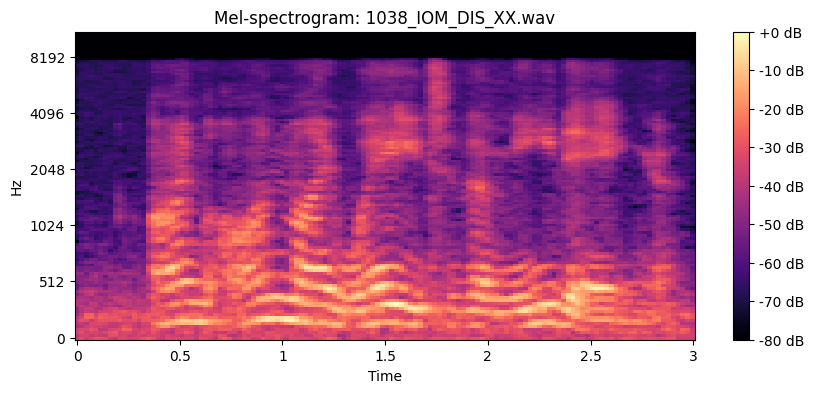

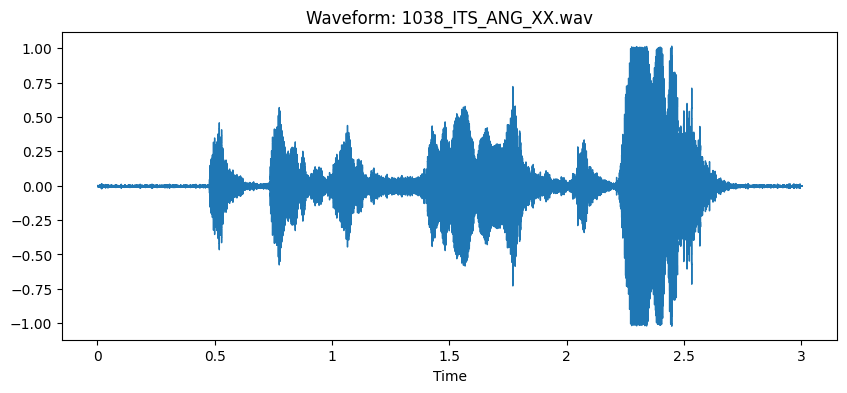

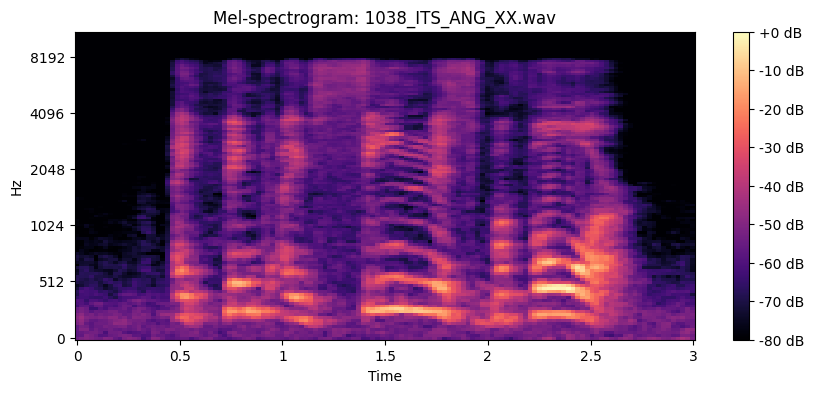

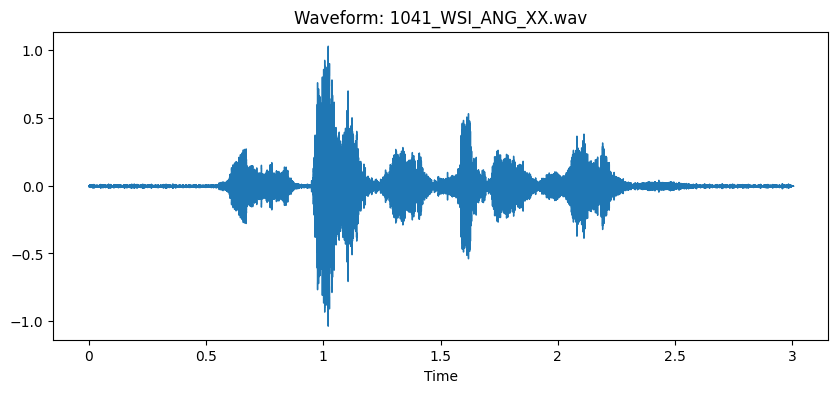

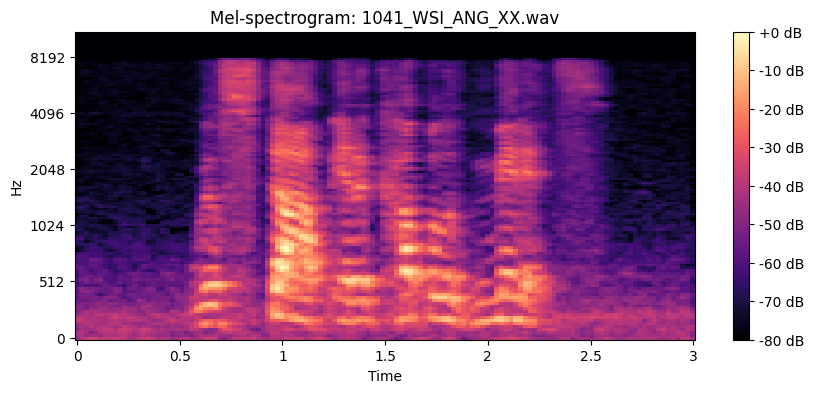

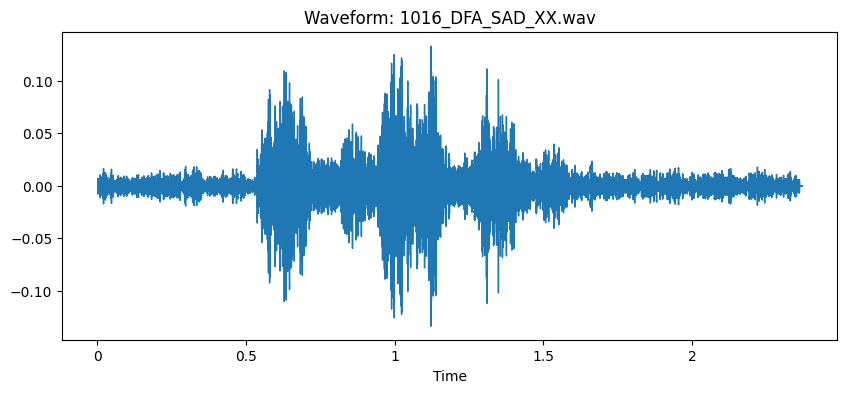

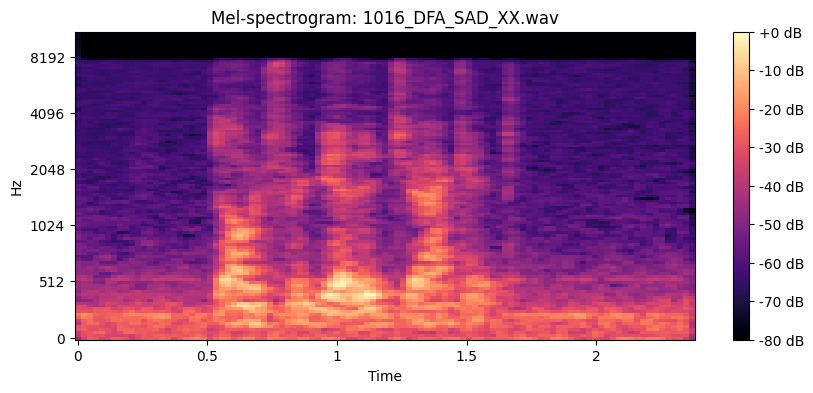

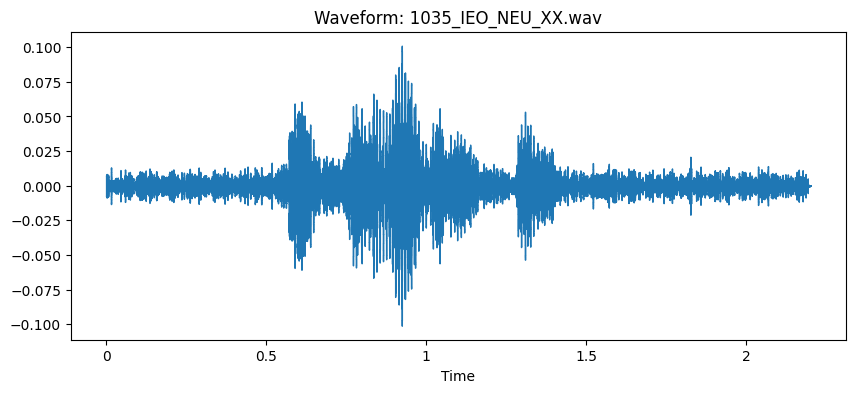

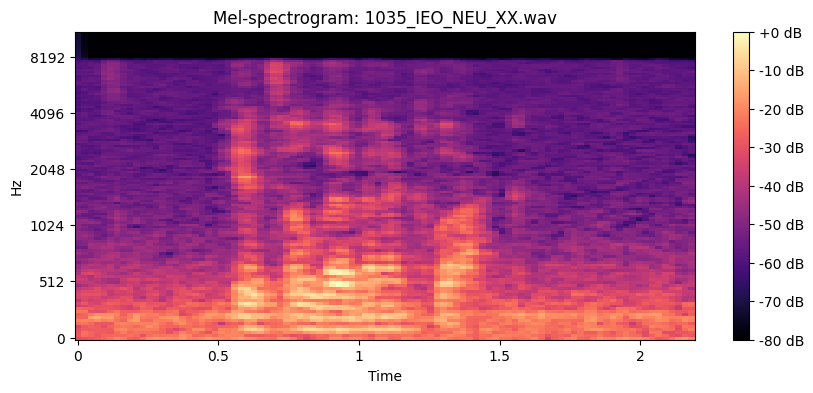

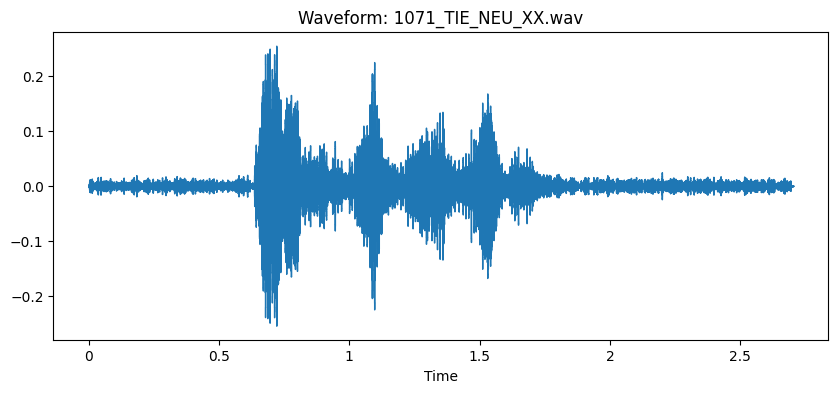

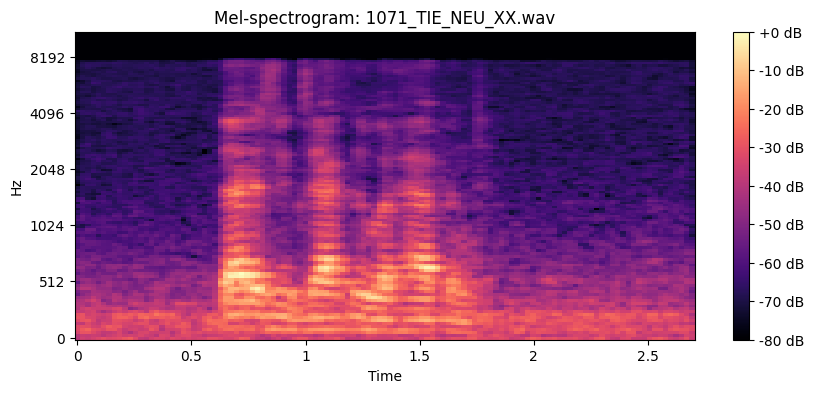

In [ ]:
# Код, который строит mel-спектрограммы и формы волн для случайных 20 .wav-файлов в папке

def build_mel_and_waveform(data_dir, num_files=20):

  wav_files = [f for f in os.listdir(data_dir) if f.endswith('.wav')]
  random_files = random.sample(wav_files, min(num_files, len(wav_files)))

  for filename in random_files:
    audio_file_path = os.path.join(data_dir, filename)

    # Загрузка аудиофайла
    y, sr = librosa.load(audio_file_path)

    # Рассчёт Mel-спектрограммы
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Отображение waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Waveform: {filename}")
    plt.show()

    # Отображение Mel-спектрограммы
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel-spectrogram: {filename}")
    plt.show()

data_dir = 'data/Crema'
build_mel_and_waveform(data_dir)

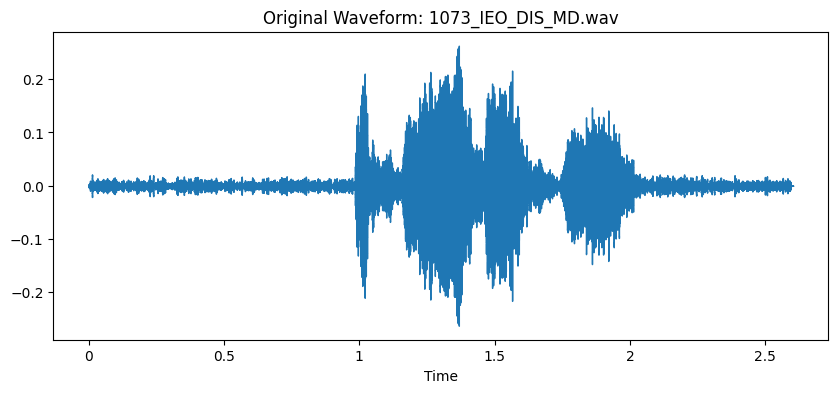

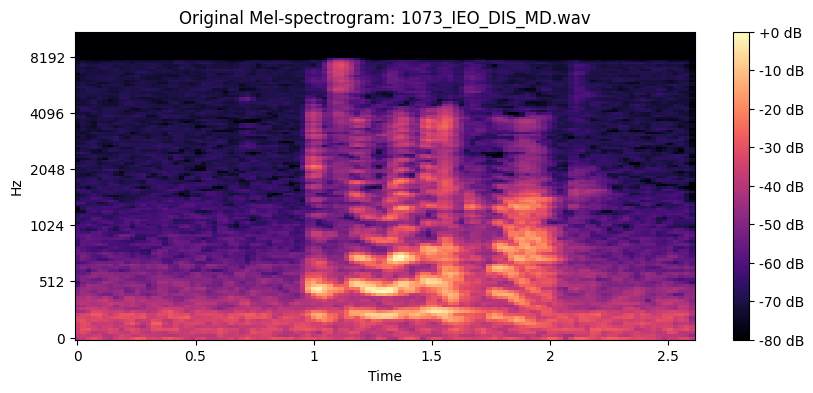

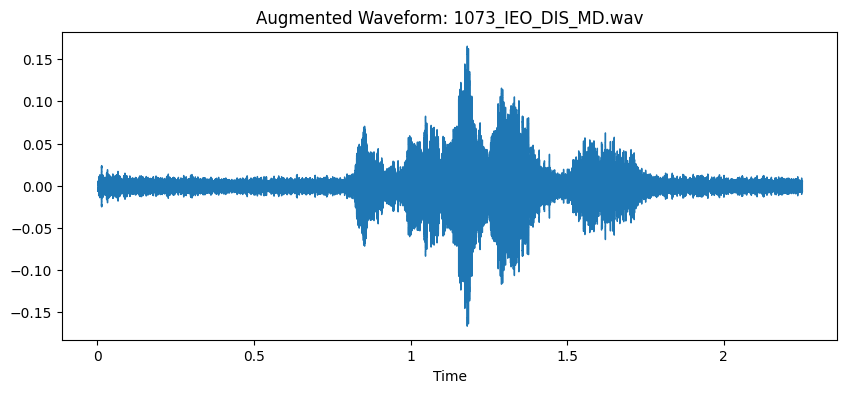

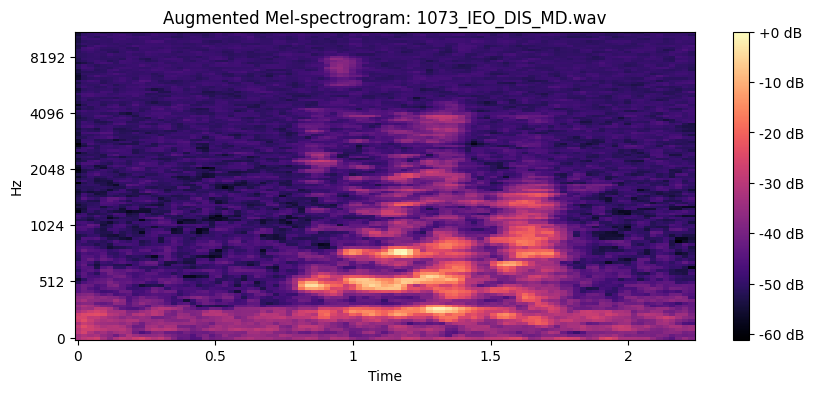

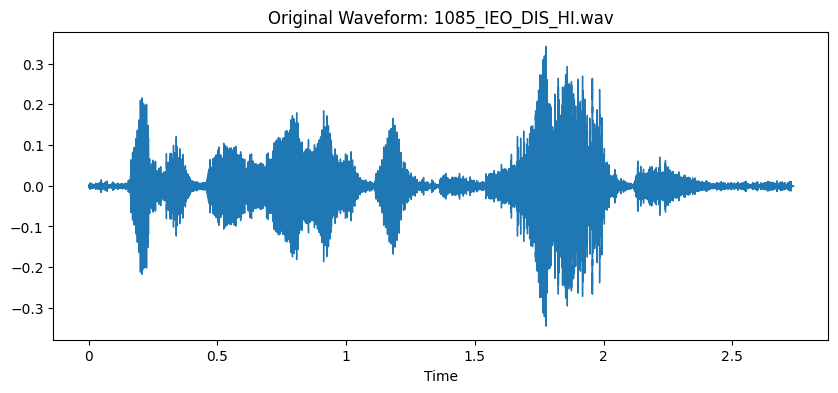

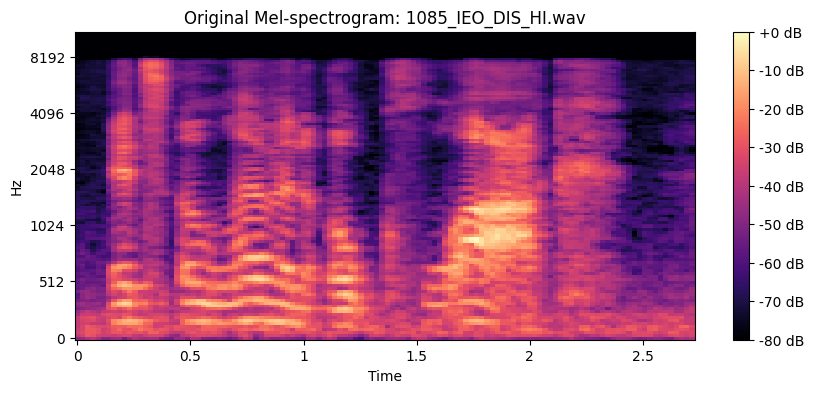

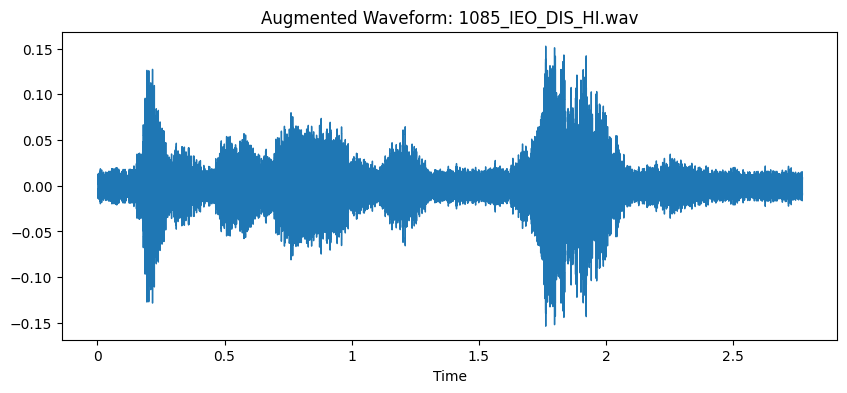

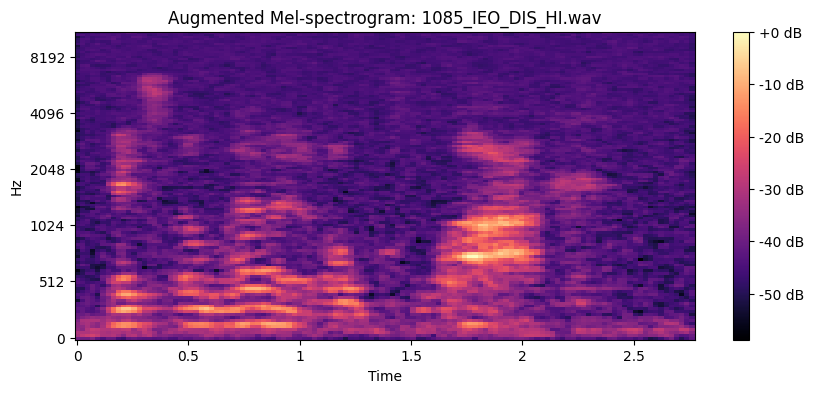

In [ ]:
# Код, который аугментирует все данные и визуализирует исходную и дополненную mel-спектрограмму и waveform.


def augment_audio(audio_data, sr):

  augmented_data = audio_data.copy()

  # Применить случайное растяжение времени
  time_stretch_rate = random.uniform(0.8, 1.2)
  augmented_data = librosa.effects.time_stretch(augmented_data, rate=time_stretch_rate)

  # Применить случайное смещение высоты тона
  pitch_shift_steps = random.randint(-3, 3)
  augmented_data = librosa.effects.pitch_shift(augmented_data, sr=sr, n_steps=pitch_shift_steps)

  # Применить случайное добавление шума
  noise_amplitude = random.uniform(0.0, 0.01)
  noise = np.random.randn(len(augmented_data)) * noise_amplitude
  augmented_data = augmented_data + noise


  return augmented_data, sr


def build_mel_and_waveform_with_augmentation(data_dir, num_files=1):

  wav_files = [f for f in os.listdir(data_dir) if f.endswith('.wav')]
  random_files = random.sample(wav_files, min(num_files, len(wav_files)))

  for filename in random_files:
    audio_file_path = os.path.join(data_dir, filename)

    # Загрузка аудиофайла
    y, sr = librosa.load(audio_file_path)

    # Рассчёт Mel-спектрограммы
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Отображение waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Original Waveform: {filename}")
    plt.show()

    # Отображение Mel-спектрограммы
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Original Mel-spectrogram: {filename}")
    plt.show()

    # Аугментирование аудиоданных
    augmented_y, augmented_sr = augment_audio(y, sr)


    # Рассчёт Mel-спектрограммы для аугментированных данных
    augmented_mel_spectrogram = librosa.feature.melspectrogram(y=augmented_y, sr=augmented_sr, n_mels=128)
    augmented_log_mel_spectrogram = librosa.power_to_db(augmented_mel_spectrogram, ref=np.max)

    # Отображение аугментированной waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(augmented_y, sr=augmented_sr)
    plt.title(f"Augmented Waveform: {filename}")
    plt.show()

    # Отображение аугментированной Mel-спектрограммы
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(augmented_log_mel_spectrogram, sr=augmented_sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Augmented Mel-spectrogram: {filename}")
    plt.show()



# Пример использования:
data_dir = 'data/Crema'
build_mel_and_waveform_with_augmentation(data_dir)# Код, который аугментирует все данные и визуализирует исходную и дополненную mel-спектрограмму и waveform.


def augment_audio(audio_data, sr):

  augmented_data = audio_data.copy()

  # Применить случайное растяжение времени
  time_stretch_rate = random.uniform(0.8, 1.2)
  augmented_data = librosa.effects.time_stretch(augmented_data, rate=time_stretch_rate)

  # Применить случайное смещение высоты тона
  pitch_shift_steps = random.randint(-3, 3)
  augmented_data = librosa.effects.pitch_shift(augmented_data, sr=sr, n_steps=pitch_shift_steps)

  # Применить случайное добавление шума
  noise_amplitude = random.uniform(0.0, 0.01)
  noise = np.random.randn(len(augmented_data)) * noise_amplitude
  augmented_data = augmented_data + noise


  return augmented_data, sr


def build_mel_and_waveform_with_augmentation(data_dir, num_files=1):

  wav_files = [f for f in os.listdir(data_dir) if f.endswith('.wav')]
  random_files = random.sample(wav_files, min(num_files, len(wav_files)))

  for filename in random_files:
    audio_file_path = os.path.join(data_dir, filename)

    # Загрузка аудиофайла
    y, sr = librosa.load(audio_file_path)

    # Рассчёт Mel-спектрограммы
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Отображение waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"Original Waveform: {filename}")
    plt.show()

    # Отображение Mel-спектрограммы
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Original Mel-spectrogram: {filename}")
    plt.show()

    # Аугментирование аудиоданных
    augmented_y, augmented_sr = augment_audio(y, sr)


    # Рассчёт Mel-спектрограммы для аугментированных данных
    augmented_mel_spectrogram = librosa.feature.melspectrogram(y=augmented_y, sr=augmented_sr, n_mels=128)
    augmented_log_mel_spectrogram = librosa.power_to_db(augmented_mel_spectrogram, ref=np.max)

    # Отображение аугментированной waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(augmented_y, sr=augmented_sr)
    plt.title(f"Augmented Waveform: {filename}")
    plt.show()

    # Отображение аугментированной Mel-спектрограммы
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(augmented_log_mel_spectrogram, sr=augmented_sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Augmented Mel-spectrogram: {filename}")
    plt.show()



# Пример использования:
data_dir = 'data/Crema'
build_mel_and_waveform_with_augmentation(data_dir)